In [137]:
using Pkg
# Pkg.add("QuadGK")
using QuadGK
using Polynomials
using Plots

In [138]:
(xp, a) = gauss(Float64,7);
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

## Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

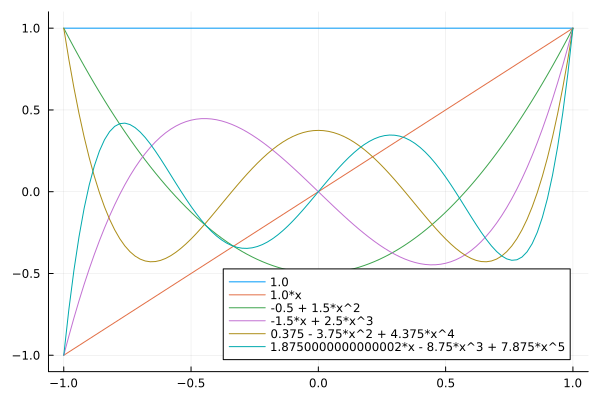

In [139]:
functions = Vector{Polynomial{Float64}}()

p0 = Polynomial([1.0])
p1 = Polynomial([0.0, 1.0])
functions = [p0, p1]
for i in 2:5
    p = (2*i-1)/(i)*p1*functions[i] - (i-1)/(i)*functions[i-1]
    push!(functions, p)
end

xs = -1:1
plot()
for f in functions
    plot!(f, extrema(xs)...)
end
plot!(ylim = (-1.1,1.1))


In [140]:
for i in 3:6
    println(roots(functions[i]))
    (xp, a) = gauss(Float64,i-1);
    println(xp, "\n")
end

[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]

[-0.7745966692414834, 0.7745966692414835, 0.0]
[-0.7745966692414834, 0.0, 0.7745966692414834]

[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]

[-0.9061798459386644, -0.5384693101056828, 0.5384693101056831, 0.906179845938664, 0.0]
[-0.906179845938664, -0.5384693101056831, 0.0, 0.5384693101056831, 0.906179845938664]



Odcięte $x_{i}$ n-punktowej kwadratury Gaussa z funkcją ważącą w są zerami wielomianu ortogonalnego dla tego samego przedziału i tej samej funkcji ważące

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [141]:
function testGauss(k,f)
    (xp, a) = gauss(Float64,k);
    sum(a .* f.(xp))
end;

In [142]:
test = [[if j != i  0 else i end for i in 1:j] for j in 1:15]


15-element Vector{Vector{Int64}}:
 [1]
 [0, 2]
 [0, 0, 3]
 [0, 0, 0, 4]
 [0, 0, 0, 0, 5]
 [0, 0, 0, 0, 0, 6]
 [0, 0, 0, 0, 0, 0, 7]
 [0, 0, 0, 0, 0, 0, 0, 8]
 [0, 0, 0, 0, 0, 0, 0, 0, 9]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15]

In [143]:
for i in 1:15
    poly = Polynomial(test[i])
    println("Polynomial level: $i, Calc: $(testGauss(4, poly)), Expected: $(1^length(poly) - ((-1)^length(poly)))")
end

Polynomial level: 1, Calc: 2.0, Expected: 2
Polynomial level: 2, Calc: -1.1102230246251565e-16, Expected: 0
Polynomial level: 3, Calc: 2.0000000000000004, Expected: 2
Polynomial level: 4, Calc: 0.0, Expected: 0
Polynomial level: 5, Calc: 2.000000000000001, Expected: 2
Polynomial level: 6, Calc: 0.0, Expected: 0
Polynomial level: 7, Calc: 2.000000000000001, Expected: 2
Polynomial level: 8, Calc: 0.0, Expected: 0
Polynomial level: 9, Calc: 1.8955102040816336, Expected: 2
Polynomial level: 10, Calc: 0.0, Expected: 0
Polynomial level: 11, Calc: 1.7163848396501462, Expected: 2
Polynomial level: 12, Calc: 0.0, Expected: 0
Polynomial level: 13, Calc: 1.5039933361099547, Expected: 2
Polynomial level: 14, Calc: 0.0, Expected: 0
Polynomial level: 15, Calc: 1.286849526982805, Expected: 2


Funkcja przestaje być dokładna przy stopniu wielomianu równym 9. Wynika to z twierdzenia o stopniu dokładności kwadratury Gaussa - jest ona dokładna dla wielomianu o stopniu równym maksymalnie $2n -1$, zatem dla kwadratury równej 4 dokładność kończy się na wielomianie stopnia 9.

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [144]:
function gaussFullTest(k,f,a,b)
    (roots,coeffs) = gauss(k)
    roots = (b-a)/2 .* roots .+ (b+a)/2
    value = (b-a)/2 .* sum(coeffs.*f.(roots))
    return value
end

gaussFullTest (generic function with 1 method)

In [145]:
test1 = Polynomial([0,2,1])

Polynomial(2*x + x^2)

In [146]:
test1 = Polynomial([0,2,1])
calc(x) = x^3/3 + x^2
a = 0
b = 4
for i in 1:5
    println("Quadrade: $i, Interval: [$a,$b], Expected: $(calc(b)- calc(a)), Got: $(gaussFullTest(i,test1,a,b))")
end

Quadrade: 1, Interval: [0,4], Expected: 37.33333333333333, Got: 32.0
Quadrade: 2, Interval: [0,4], Expected: 37.33333333333333, Got: 37.33333333333333
Quadrade: 3, Interval: [0,4], Expected: 37.33333333333333, Got: 37.33333333333333
Quadrade: 4, Interval: [0,4], Expected: 37.33333333333333, Got: 37.333333333333336
Quadrade: 5, Interval: [0,4], Expected: 37.33333333333333, Got: 37.33333333333332


In [147]:
test2(x) = sin(x) + cos(x)
calc(x) = -cos(x) + sin(x)
a = 0
b = 7
for i in 1:6
    println("Quadrade: $i, Interval: [$a,$b], Expected: $(calc(b)- calc(a)), Got: $(gaussFullTest(i,test2,a,b))")
end

Quadrade: 1, Interval: [0,7], Expected: 0.9030843443754845, Got: -9.010679404862913
Quadrade: 2, Interval: [0,7], Expected: 0.9030843443754845, Got: 3.9187638947631154
Quadrade: 3, Interval: [0,7], Expected: 0.9030843443754845, Got: 0.5444222534008676
Quadrade: 4, Interval: [0,7], Expected: 0.9030843443754845, Got: 0.9245839988764366
Quadrade: 5, Interval: [0,7], Expected: 0.9030843443754845, Got: 0.9023066755774547
Quadrade: 6, Interval: [0,7], Expected: 0.9030843443754845, Got: 0.9031031889296576


In [148]:
test3 = exp
calc(x) = exp(x)
a = 0
b = 12
for i in 1:5
    println("Quadrade: $i, Interval: [$a,$b], Expected: $(calc(b)- calc(a)), Got: $(gaussFullTest(i,test3,a,b))")
end

Quadrade: 1, Interval: [0,12], Expected: 162753.79141900392, Got: 4841.145521912821
Quadrade: 2, Interval: [0,12], Expected: 162753.79141900392, Got: 77407.60916762098
Quadrade: 3, Interval: [0,12], Expected: 162753.79141900392, Got: 142466.55136787545
Quadrade: 4, Interval: [0,12], Expected: 162753.79141900392, Got: 159999.928582762
Quadrade: 5, Interval: [0,12], Expected: 162753.79141900392, Got: 162509.96213554274


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [149]:
test1 = Polynomial([0,2,1])
calc(x) = x^3/3 + x^2
a = 0
b = 4
println("QuadGK, Interval: [$a,$b], Expected: $(calc(b)- calc(a)), Got:  $(quadgk(test1,a,b)[1])")

QuadGK, Interval: [0,4], Expected: 37.33333333333333, Got:  37.333333333333336


In [150]:
test_quad(x) = exp((-x^2)/2)/sqrt(2*pi)
a = -Inf
b = Inf
println("QuadGK, Interval: [$a,$b], Expected: 1 Got: $(quadgk(test_quad,a,b)[1])")

QuadGK, Interval: [-Inf,Inf], Expected: 1 Got: 1.0000000000032583


### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


In [151]:
function rectangle(f, a, b, n)
    h = (b - a) / n
    sum = 0.0
    for i in 0:n-1
        x = a + i * h
        sum += f(x)
    end
    return h * sum
end;


function trapezoidal(f, a, b, n)
    h = (b - a) / n
    sum = 0.0
    for i in 0:n-1
        x = a + i * h
        sum += (f(x) + f(x + h))
    end
    return h * sum/2
end;


function simpson(f, a, b, n)
    h = (b - a) / n
    sum = f(a) + f(b)
    for i in 1:n-1
        x = a + i * h
        if i % 2 == 0
            sum += 2 * f(x)
        else
            sum += 4 * f(x)
        end
    end
    return h / 3 * sum
end;

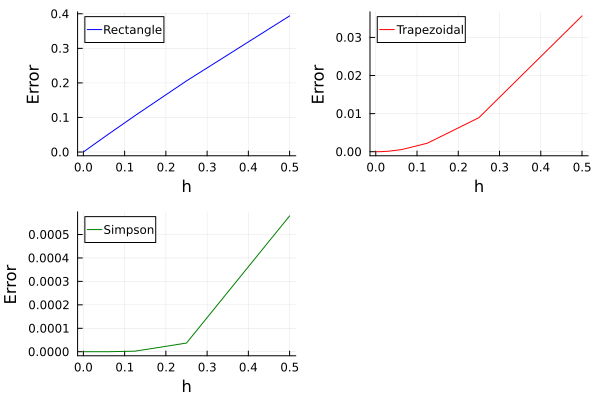

In [156]:
f(x) = exp(x)
a, b = 0, 1
exact_value = exp(b) - exp(a)

rect_err(f, a, b, n) = abs(rectangle(f, a, b, n) - exact_value)
trap_err(f, a, b, n) = abs(trapezoidal(f, a, b, n) - exact_value)
simp_err(f, a, b, n) = abs(simpson(f, a, b, n) - exact_value)

ns = 2 .^(1:10)
h = (b - a) ./ ns

rect_errs = [rect_err(f, a, b, n) for n in ns]
trap_errs = [trap_err(f, a, b, n) for n in ns]
simp_errs = [simp_err(f, a, b, n) for n in ns]

plot(h, [rect_errs, trap_errs, simp_errs], label=["Rectangle" "Trapezoidal" "Simpson"], color = [:blue :red :green], xlabel="h", ylabel="Error", layout = 3)

# xaxis =:log

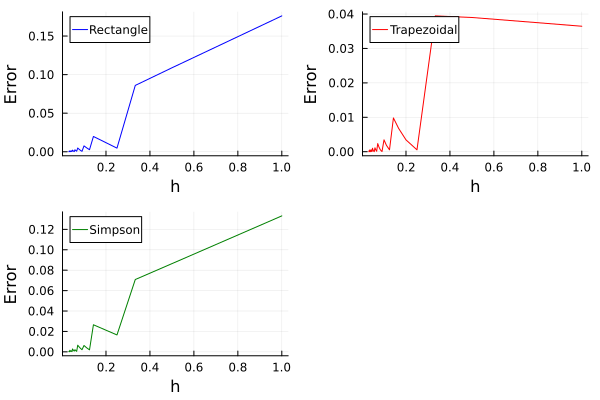

In [196]:
f(x) = sin(x)
a, b = 0, 2*pi
exact_value = cos(a)-cos(b)

rect_err(f, a, b, n) = abs(rectangle(f, a, b, n) - exact_value)
trap_err(f, a, b, n) = abs(trapezoidal(f, a, b, n) - exact_value)
simp_err(f, a, b, n) = abs(simpson(f, a, b, n) - exact_value)

ns = pi .*(2:2:64)
h = (b - a) ./ ns

rect_errs = [rect_err(f, a, b, n) for n in ns]
trap_errs = [trap_err(f, a, b, n) for n in ns]
simp_errs = [simp_err(f, a, b, n) for n in ns]

plot(h, [rect_errs trap_errs simp_errs], label=["Rectangle" "Trapezoidal" "Simpson"], color = [:blue :red :green], xlabel="h", ylabel="Error", layout = 3)

#  xaxis =:log
